## CJ Jones
## Econ 313
## OLS Homework
## Oct. 21st, 2021

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2
import numpy as np


/Users/connorjones/mystuff/uchicago-31340-psets


In [2]:
N = 1000
K = 10
X = np.random.normal(size = (N,K))
E = np.random.normal(size = N)
beta = np.linspace(0,1,num=K)

Y = np.matmul(X,beta) + E

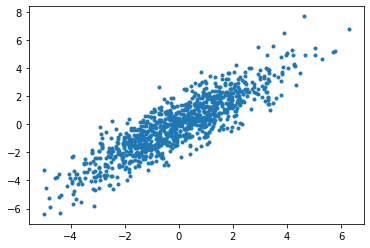

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.matmul(X,beta),Y,'.')
plt.show()

## Question 1 - Numpy OLS Function

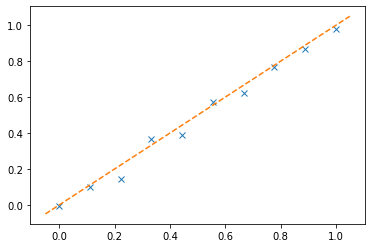

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def numpy_ols(Y, X):
    inside = np.matmul(np.transpose(X), X)
    alpha = np.linalg.solve(inside, np.identity(K))
    inv_trn = np.matmul(alpha, np.transpose(X))
    r = np.matmul(inv_trn, Y)
    return r;

beta_hat = numpy_ols(Y,X)
plt.plot(beta,beta_hat,'x')
abline(1,0)
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(K,)))
model.add(Activation('sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='mse')
hist = model.fit(X, Y, epochs=100, batch_size=50, verbose=0)

2021-10-21 21:33:47.787185: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-21 21:33:47.787434: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


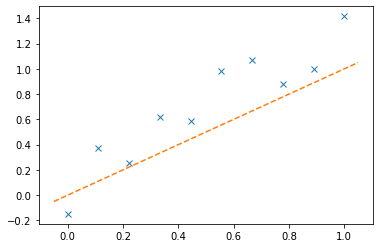

In [7]:
beta_keras = model.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)
plt.show()

## Problem 2 - Linear Activation Function

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


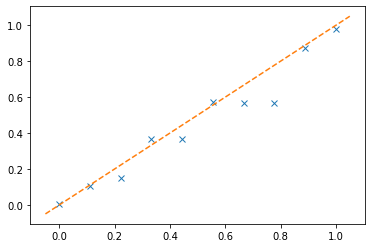

In [8]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(K,)))
model2.add(Activation('linear'))
model2.summary()

model2.compile(optimizer='adam', loss='mse')
hist2 = model2.fit(X, Y, epochs=100, batch_size=50, verbose=0);
beta_keras = model2.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

In [9]:
X = 10*np.random.uniform(size = N)
Y = np.cos(X) + 0.5*np.random.normal(size = N)

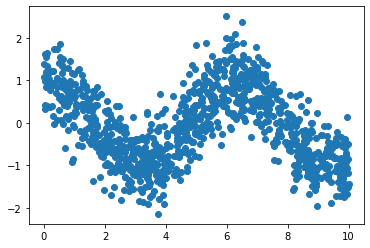

In [10]:
plt.plot(X,Y,'o')
plt.show()

In [11]:
model3 = Sequential()
model3.add(Dense(20, input_shape=(1,)))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


## Question 3 - Fit Model Function

This model contains three seperate layers including two hidden layers that use the 'elu' activation function and a final Output layer that uses the default linear activation function.  The first layer generates 20 diferent output weights that the second layer of the model recompresses back down.  There is only one input as there is only one independant variable being used to predict the outcome.

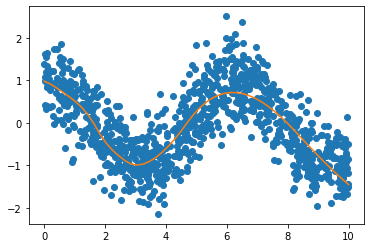

In [12]:
def fit_model3(model,X,Y):
    model.compile(optimizer='adam', loss='mse')
    hist3 = model.fit(X, Y, epochs=500, batch_size=75, verbose=0);
    beta_keras = model.layers[2].get_weights()[0]
    return;

fit_model3(model3,X,Y)

Xp = np.linspace(0,10,num=50)
Yp = model3.predict(Xp)
plt.plot(X,Y,'o')
plt.plot(Xp,Yp,'-')
plt.show()